# DS3000 Day 4

Sept. 23, 2025

Admin

- Lab 2 will be **Sept. 30th**
- Project Phase I: Proposal due by **October 5th**
- Project Groups will be assigned Monday **October 8**
- Homework 2 due by **October 3rd**, **Homework 3** (due **Oct 17**) will be posted
- On Sept. 25th we have a guest lecture in the 2:50 PM class! The speaker is Mr. Karanbir Singh from Salesforce. He will discuss about Ethics of ML. Those in the Friday sections i.e., 03 and 05 if you are free you can come to 04 section or join virtually! 
[Meeting link](https://northeastern.zoom.us/j/92994398974?pwd=6eLCZ26f6KqZKbw6pdYmwnbuTvVO3C.1)


Push-Up Tracker
- Section 03:0
- Section 04:1 
- Section 05:1

Content:
- Exploring Data
    - Basic Data Summaries and Intro to Vectors
         - (This leads us into the **MATH** part of the course!)
![s](https://64.media.tumblr.com/64473de68f3efee55b24dc1d5c881458/8f9b7a2f21d7b8ff-04/s1280x1920/08b38e3b7a1d8baddcc77f8f1e8f5f71257f6317.jpg)

## Describing Sets of Numbers

- types of data
    - numeric vs categorical
    
- measures of central tendency (and when to use each)
    - mean
    - median
    - mode
- measures of dispersion
    - variance and standard deviation

## Types of Data

### Categorical Data
- categorical data need not be ordered
- examples:
    - favorite color of person 
        - green, blue, red, ...
    - which network discusses a stock most
        - cnn, fox, msnbc
    - type of weather in a given day
        - rainy, sunny, windy
    
### Numerical (continuous) data:
- data always has an order (ordered data)
    - for every pair of items x, y in the data either:
        - x < y
        - x > y
        - x = y
- between every pair of items, there is another item
- examples:
    - height of a person
        - 5'6", 5'10"
    - value of a stock
        - \\$123.45, \\$8
    - amount of rain in a day
        - 2", 0"


## Measures of Center for Numerical Data:

- Sample Mean
- Sample Median

## Sample Mean

**Sample Mean** of a population is the arithmetic average:
$$ \bar{x} = \frac{1}{N} \sum_i x_i $$

## Sample Median 

is the "halfway" point (the 50th percentile) of a set of sorted values:
- half of the remaining data is greater than median
- half of the remaining data is less than  median

If a set of numbers has an even number of points then median is mean of middle most two points.

Median is an attractive measure of center when:
- data is inconsistently distributed (e.g. log scaled data)
- data contains outliers
    **outlier:** a value which is atypically far from the average (datum are typically closer to the average)

## Measures of Spread for Numerical Data:

- Sample Variance
- Sample Standard Deviation
- Sample Quartiles

## Observations vs Ground Truth

    Fishing in a new pond, you catch fish which are 3 lbs and another which is 5 lbs.  
    What can (and can't) you say about the average fish weight in the pond?


- **Observed** data points can be collected from an experiment.
- The **Ground Truth** describes information which is absolutely true.  
    - we rarely know ground truth information about distributions
        - instead ... we estimate them
        
       
### Language (and notation) to distinguish between observations and ground truth:

| **Observed**                             | **Ground Truth**            |
|------------------------------------------|-----------------------------|
| Sample Mean $\bar{x}$                    | Expected Value $E[x], \mu$       |
| Sample Standard Deviation $\hat{\sigma}$ | Standard Deviation $\sigma$ |
| Sample Variance $\hat{\sigma^2}$         | Variance $\sigma^2$         |

**(In DS practice, because almost all our data is observed, we rarely say "Sample Mean" and usually just say "Mean", and usually when folks just say "Standard Deviation" or "Variance" they mean the "Sample Standard Deviation" and "Sample Variance")**
    

### Variance and Sample Variance
**Variance** is the average squared distance from the mean. 
$$ \sigma^2 = \frac{1}{N} \sum_i (x_i-\mu)^2 $$
where $\mu$ is the expected value of the distribution that $x_i$ came from.

Rarely do we know the distribution (or its mean $\mu$).  The best we can do is estimate this value as the **Sample Variance**:
$$ \hat{\sigma}^2 = \frac{1}{N-1} \sum_i (x_i-\bar{x})^2 $$
where $\bar{x}$ is the sample mean.  

**Note the $\frac{1}{N-1}$ term in Sample Variance (Bessel's Correction) differs from the $\frac{1}{N}$ term in Variance above.**

In [18]:
df_grades = pd.DataFrame({'quiz1': [6, 7, 8, 8, 6, 7, 7, 6, 8],
                          'quiz2': [6, 5, 6, 10, 9, 5, 6, 10, 6]})
df_grades

,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


In Quiz 2 we see that the sample mean is the same, but the distances from the mean are bigger:
$$ \hat{\sigma}^2 = \frac{1}{9-1} \cdot((-1)^2 + (-2)^2 + (-1)^2 + 3^2 + 2^2 + (-2)^2 + (-1)^2 + 3^2 + (-1)^2) = \frac{34}{8} = 4.25$$

In [41]:
df_grades.var()

quiz1    0.75
quiz2    4.25
dtype: float64

Even though the average for the two quizes are the same it seems like the quizes were different:
* all the students found the first quiz similarly difficult.
* some students nailed the second quiz and some there were also some did quite poorly

### Standard deviation
Standard deviation is just the square root of the variance:

$$ \hat{\sigma} = \sqrt{\hat{\sigma}^2} = \sqrt{\frac{1}{N-1} \sum_i (x_i-\bar{x})^2} $$

#### Common misconception:
Wait, square root of average squared distance from mean ... isn't it just the average distance from mean?

No!
* square root of a sum does not equal the sum of square roots 

In [19]:
# compute standard deviation
df_grades.std()

quiz1    0.866025
quiz2    2.061553
dtype: float64

In [20]:
# compute square root of variances (same as std dev)
np.sqrt(df_grades.var())

quiz1    0.866025
quiz2    2.061553
dtype: float64

### Co-variance & correlation: Qualitatively
(How two values vary together)

The behavior between any two values x and y can be summarized in one of the three ways:
1. as x gets larger y typically gets larger too
    - ex: 
        - `x=temp on some day`
        - `y=number of people on the beach on the same day`
    - covariance & correlation is positive
2. as x gets larger y typically doesn't get larger or smaller
    - ex: 
        - `x=individual's favorite number`
        - `y=number of hot dogs that individual has eaten in their lifetime`
    - covariance & correlation is zero
3. as x gets larger, y typically gets smaller
    - ex: 
        - `x=average speed of driver on 10 mile commute`
        - `y=average commute time of driver on 10 mile commute`
    - covariance & correlation are negative

Covariance & Correlation are only defined between two values when the observations are somehow **linked**:
1. on the same **day**, we observe temp & beach population
1. on the same **individual**, we observe favortie number & hot dogs eaten
1. on the same **driver**, we observe speed and commute time

If we don't observe the data in pairs, correlation / covariance is not defined:
- `x=an individual's favorite number`
- `y=the temperature on a given day`

`x` is observed per individual while `y` is observed per day ... there isn't a way to "pair" every x with a y!

In [26]:
df_EUpop = pd.read_csv('europe_pop_data.zip')

df_EUpop['area'] = df_EUpop['area'].str.replace(r'\D', '', regex=True).astype(int)

df_EUpop['population'] = df_EUpop['population'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop['pop_density'] = (df_EUpop.population/df_EUpop.area).round(1)



df_EUpop.iloc[:, np.r_[4:11]].cov()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
area,8.000314e+12,6.313201e+13,-4.582980e+06,-2.597495e+06,4.074482e+04,1.622372e+06,-8.182096e+07
population,6.313201e+13,9.021667e+14,-3.023432e+07,-1.419289e+07,-2.844891e+06,1.829263e+07,-5.710219e+08
male_life_expectancy,-4.582980e+06,-3.023432e+07,2.230197e+01,1.283270e+01,1.187968e+00,-1.165654e+01,3.742888e+02
female_life_expectancy,-2.597495e+06,-1.419289e+07,1.283270e+01,8.319135e+00,3.013413e-01,-6.557841e+00,1.956119e+02
birth_rate,4.074482e+04,-2.844891e+06,1.187968e+00,3.013413e-01,1.231897e+00,-1.587397e+00,-4.224056e+01
death_rate,1.622372e+06,1.829263e+07,-1.165654e+01,-6.557841e+00,-1.587397e+00,8.813968e+00,-2.172171e+02
pop_density,-8.182096e+07,-5.710219e+08,3.742888e+02,1.956119e+02,-4.224056e+01,-2.172171e+02,7.177194e+04


## Computing Co-variance 


**Sample covariance:**
$$ \texttt{cov}(x, y) = \frac{1}{N-1} \sum_i (x_i - \bar{x})(y_i - \bar{y})$$



A covariance matrix contains the covariance of every pair of elements:
    
|   |         x |         y |
|--:|----------:|----------:|
| x | cov(x, x) | cov(x, y) |
| y | cov(y, x) | cov(y, y) |

- Note 1: cov(x, y) = cov(y, x) (always, not just in this example)
- Note 2: cov(x, x) is the variance of x and itself

## Correlation (motivation)

Covariance by itself is not actually very useful, since the units are not (usually) interpretable. Instead, we usually use correlation.

Which has a more consistent relationship? (or maybe they're the same?)
- height of a person in `inches`
- height of a person in `cm`

or
- height of a person in `inches`
- height of a person in `feet`

In [49]:
inch_to_cm = 2.54
inch_to_feet = 1/12

df_height = pd.DataFrame({'height_inches': [68, 69, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height

,height_inches,height_cm,height_feet
0,68,172.72,5.666667
1,69,175.26,5.750000
2,70,177.80,5.833333
3,72,182.88,6.000000
4,55,139.70,4.583333
5,77,195.58,6.416667


In [50]:
df_height.cov()

,height_inches,height_cm,height_feet
height_inches,53.900000,136.906000,4.491667
height_cm,136.906000,347.741240,11.408833
height_feet,4.491667,11.408833,0.374306


- Covariance between `height_inches` and `height_cm` ~= 136
- Covariance between `height_inches` and `height_feet` ~= 4

So is there a stronger relationship between `height_inches` and `height_cm`? ...

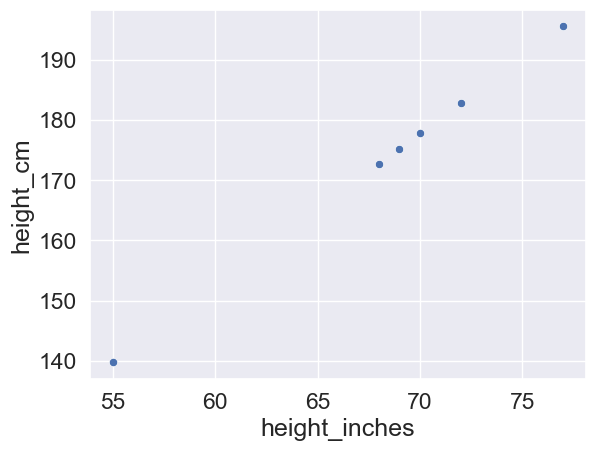

In [51]:
sns.scatterplot(data=df_height, x='height_inches', y='height_cm');

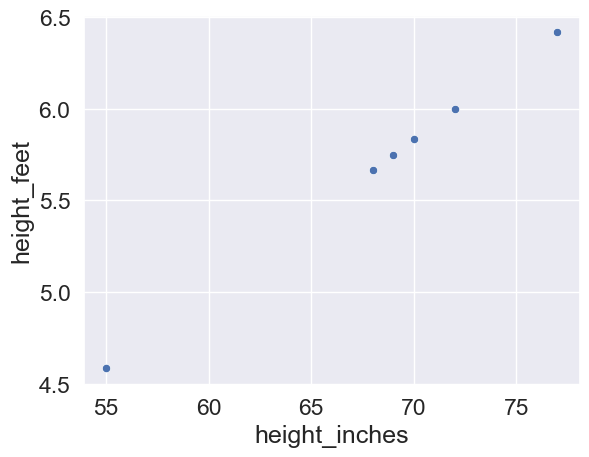

In [52]:
sns.scatterplot(data=df_height, x='height_inches', y='height_feet');

So is there a stronger relationship between `height_inches` and `height_cm`? ...

... not at all, they have the *same* relationship.  Its just that covariance depends on the units we measure in.  Smaller units -> bigger values -> bigger covariance.

## The 'strongest' relationship between two variables

In some sense, this is the 'strongest' possible relationship.  When one variable increases, the other always does so too.  

**Helpful fact:**
The covariance is always smaller than the product of the standard deviations of both variables:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$


## Correlation (Compute)

Remember, the biggest (and smallest) covariance we can possibly have is the product of the standard deviations:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

Correlation: "How big of a covariance do you have comapred to how big it could possibly be?"

$$corr(x,y) = \frac{\texttt{cov}(x, y)}{\sigma_x \sigma_y} $$

In doing so, it removes any effect of the scale of the data might have (e.g. changing units).

In [32]:
df_EUpop.iloc[:, np.r_[4:11]].cov()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
area,8.000314e+12,6.313201e+13,-4.582980e+06,-2.597495e+06,4.074482e+04,1.622372e+06,-8.182096e+07
population,6.313201e+13,9.021667e+14,-3.023432e+07,-1.419289e+07,-2.844891e+06,1.829263e+07,-5.710219e+08
male_life_expectancy,-4.582980e+06,-3.023432e+07,2.230197e+01,1.283270e+01,1.187968e+00,-1.165654e+01,3.742888e+02
female_life_expectancy,-2.597495e+06,-1.419289e+07,1.283270e+01,8.319135e+00,3.013413e-01,-6.557841e+00,1.956119e+02
birth_rate,4.074482e+04,-2.844891e+06,1.187968e+00,3.013413e-01,1.231897e+00,-1.587397e+00,-4.224056e+01
death_rate,1.622372e+06,1.829263e+07,-1.165654e+01,-6.557841e+00,-1.587397e+00,8.813968e+00,-2.172171e+02
pop_density,-8.182096e+07,-5.710219e+08,3.742888e+02,1.956119e+02,-4.224056e+01,-2.172171e+02,7.177194e+04


In [31]:
df_EUpop.iloc[:, np.r_[4:11]].corr()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
area,1.000000,0.743109,-0.343102,-0.318392,0.012979,0.193202,-0.107978
population,0.743109,1.000000,-0.213150,-0.163828,-0.085337,0.205138,-0.070963
male_life_expectancy,-0.343102,-0.213150,1.000000,0.942122,0.226645,-0.831404,0.295841
female_life_expectancy,-0.318392,-0.163828,0.942122,1.000000,0.094131,-0.765837,0.253151
birth_rate,0.012979,-0.085337,0.226645,0.094131,1.000000,-0.481740,-0.142058
death_rate,0.193202,0.205138,-0.831404,-0.765837,-0.481740,1.000000,-0.273106
pop_density,-0.107978,-0.070963,0.295841,0.253151,-0.142058,-0.273106,1.000000


## Let's discuss Correlation some more

Correlations are shown above each scatter (credit: wikipedia)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" alt="Drawing" style="width: 800px;"/>

Common misconception:

- if x and y are independent, then they're uncorrelated
- if x and y are uncorrelated, they need not be uncorrelated
    - (see examples in last row directly above)

## The most important correlation/covariance slide: why did we go through all this trouble?

- mean describes where a feature typically is
- variance / standard deviation describes how consistently a feature stays near its mean
- correlation describes which relationship two values have:
    - when x increases, y typically increases
    - when x increases, y typically stays the same
    - when x increases, y typically decreases
    - **MOST IMPORTANTLY**: Just because two features have a correlation, **does not** mean they have anything to do with each other: [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)

![sd](https://miro.medium.com/v2/resize:fit:547/1*2BnD3YAUBGNutkKiG5dKfg.jpeg)


![h](https://miro.medium.com/v2/resize:fit:600/0*PM2JXsJKrkZUS3DL.jpg)

## Reminder: representing data (samples & features)
To describe a collection of **samples** we record a set of **features** for each sample.

For example, when describing penguins:

In [33]:
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True)

df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Each penguin is a sample for which we've observed 7 features:
- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex 

A numerical dataset can be represented as an array (we'll return to those categorical variables `species`, `island` and `sex` later on). 

**By convention, sklearn (our Python ML library) represent:**
- each sample as a row 
- each feature as a column 


## Samples as vectors (or, "Uh-Oh, here comes some math!")

In [59]:
# only focus on numerical features (for now)
col_num_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_penguin_num = df_penguin.loc[:, col_num_list]

# for pedagogical reasons, we need penguin1 to have slightly different values
df_penguin_num.iloc[1, :] = [40.2, 17.9, 194.0, 3700]

df_penguin_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,40.2,17.9,194.0,3700.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Individual samples (penguins) are considered, mathematically, as vectors.  When sklearn looks at the first penguin it sees:

In [60]:
np.array(df_penguin_num.iloc[0, :])

array([  39.1,   18.7,  181. , 3750. ])

## Distances between samples
Many ML tools require that these vectors have meaningful distances between them.  
- A pair of samples with a large distance between them are considered different
- A pair of samples with a small distance between them are considered similar

Computing (the $\ell_2$, or Euclidean) distance between two vectors $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$:

$$||x - x'||_2 = \sqrt{\sum_i (x_i - x_i')^2}$$

In words, to compute the distance between two vectors:
- we square the differences of each element
- add these values together
- compute the square root of this sum

How similar is penguin0 to penguin1?

In [61]:
penguin0 = df_penguin_num.iloc[0, :]
penguin0

bill_length_mm         39.1
bill_depth_mm          18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: 0, dtype: float64

In [62]:
penguin1 = df_penguin_num.iloc[1, :]
penguin1

bill_length_mm         40.2
bill_depth_mm          17.9
flipper_length_mm     194.0
body_mass_g          3700.0
Name: 1, dtype: float64

In [63]:
sq_diff_per_feat = [(39.1 - 40.2) ** 2, (18.7 - 17.9) ** 2, (181 - 194) ** 2, (3750 - 3700) ** 2]
l2_dist = sum(sq_diff_per_feat) ** .5
l2_dist

51.68026702717392

In and of itself, this distance isn't too insightful ... the penguins are 50 ?unit? apart?  The value becomes more useful when compared to other distances.  Is penguin 1 more similar to penguin 0 or penguin 2?

In [64]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 51.680
distance between penguin1 and penguin2: 450.001


So: penguin0 and penguin1 are more similar since we observed:

    distance between penguin0 and penguin1: 51.680
    distance between penguin1 and penguin2: 450.001
    
Is this satisfying or should penguin1 and penguin2 be considered more similar?  Lets break it out by feature:

In [65]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[0, :]

bill_length_mm        1.1
bill_depth_mm        -0.8
flipper_length_mm    13.0
body_mass_g         -50.0
dtype: float64

In [66]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[2, :]

bill_length_mm        -0.1
bill_depth_mm         -0.1
flipper_length_mm     -1.0
body_mass_g          450.0
dtype: float64

The bills and flippers of penguin2 and penguin1 are just about identical ... but their difference in body mass is so large that it yields a large distance.

## Big Idea 1: Distances assume that a change of 1 unit (in any feature) is equally significant

What if we measured the body mass of the penguin in a different unit?

In [67]:
# replace body_mass_g with body_mass_kg
df_penguin_num['body_mass_kg'] = df_penguin_num['body_mass_g'] / 1000
del df_penguin_num['body_mass_g']

df_penguin_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg
0,39.1,18.7,181.0,3.75
1,40.2,17.9,194.0,3.70
2,40.3,18.0,195.0,3.25


In [68]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 13.071
distance between penguin1 and penguin2: 1.106


These numbers aren't just different, they claim an opposite conclusion: penguin1 and penguin2 are more similar!

- **Distances assume that a change of 1 unit (in any feature) is equally significant**
- **Distances implicitly weight how important each feature is relative to others according to its variance**
    - a feature with a higher variance is responsible for more of the distances
    
To wrap all the different features into a single distance we must say *something* about how important one feature is compared to another.  

In [69]:
df_penguin_num.std()

bill_length_mm        5.467070
bill_depth_mm         1.969606
flipper_length_mm    13.996877
body_mass_kg          0.805387
dtype: float64

### Scale Normalization:
How to scale your features so that they're equally important in our distance metric:

In [70]:
# by dividing each feature by the standard deviation, outputs will have same std dev
df_penguin_num_scaled = pd.DataFrame()
for feat in df_penguin_num.columns:
    df_penguin_num_scaled[f'{feat}_scaled'] = df_penguin_num[feat] / df_penguin_num[feat].std()

In [71]:
df_penguin_num_scaled.std()

bill_length_mm_scaled       1.0
bill_depth_mm_scaled        1.0
flipper_length_mm_scaled    1.0
body_mass_kg_scaled         1.0
dtype: float64

In [72]:
df_penguin_num_scaled.head(3)

,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled,body_mass_kg_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Notice that in doing so, our units are no longer valid, so lets remove the units:

In [73]:
df_penguin_num_scaled.columns = ['bill_length_scaled',
                                'bill_depth_scaled',
                                'flippter_length_scaled',
                                'body_mass_scaled']
df_penguin_num_scaled.head(3)

,bill_length_scaled,bill_depth_scaled,flippter_length_scaled,body_mass_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Now, which penguins are actually most similar?

In [74]:
vec_penguin0 = np.array(df_penguin_num_scaled.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num_scaled.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num_scaled.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 1.035
distance between penguin1 and penguin2: 0.566


### Note on Normalization:

There are **many** ways to normalize data! The above is only one (very simple) way, but is actually not the most popular. In addition to scale normalizing, there is also:

- **Standardization** (probably the most common): subtract all features by their **mean**, then divide by their **standard deviation**
- **Min-Max Scaling**: subtract all features by their **minimum**, then divide by their **range**

I may use any of the three (scale normalization, standardization, min-max scaling), but will most often use scale normalization because it's the easiest...

# What do we do with categorical features?
## One hot encoding and "Dummy" variables
### (Representing categorical variables in the sample vector as numbers)

**One hot encoding:** replace each categorical column with a set of columns per each unique category.  These new columns (called dummy variables) have value 1 where the original row belonged to the corresponding category.

![g](https://preview.redd.it/ml-terminology-strikes-again-v0-6f7z17ptl6xa1.jpg?width=640&crop=smart&auto=webp&s=e778bd2f290263bbb72f490db819faab9f6c5ebe)

In [75]:
df_penguin = sns.load_dataset('penguins')

# discard penguins with missing features
df_penguin.dropna(axis=0, inplace=True)

# shuffle order of rows
df_penguin = df_penguin.sample(frac=1, random_state=1)

# grab only the first few rows
df_penguin = df_penguin.head()

df_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,Male
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,Female


In [76]:
pd.get_dummies(df_penguin, columns=['species'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
65,Biscoe,41.6,18.0,192.0,3950.0,Male,True,False,False
276,Biscoe,43.8,13.9,208.0,4300.0,Female,False,False,True
186,Dream,49.7,18.6,195.0,3600.0,Male,False,True,False
198,Dream,50.1,17.9,190.0,3400.0,Female,False,True,False
293,Biscoe,46.5,14.8,217.0,5200.0,Female,False,False,True


In [77]:
pd.get_dummies(df_penguin, columns=['species', 'island', 'sex'], dtype='float')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,sex_Female,sex_Male
65,41.6,18.0,192.0,3950.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
276,43.8,13.9,208.0,4300.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
186,49.7,18.6,195.0,3600.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
198,50.1,17.9,190.0,3400.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
293,46.5,14.8,217.0,5200.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Intro to Machine Learning 

Before we move on (as we've already started a little bit into the key mathematical concepts), let's set up **WHY** we're about to do all this math and how we need to be careful moving forward with real data:

## What is *Machine Learning* anyway?

- Start with data: observed measures from the real world
- Develop a strategy of analysis that leads to choosing an appropriate algorithm
- "Learn" $\rightarrow$ improve the algorithm, identify patterns in the data
- Make predictions on new observations based on the results of the model, or clarify understanding of patterns

### Example ML Algorithms

#### Supervised Learning (Prediction)
- Linear Perceptron*
- Support Vector Machines
- Logistic Regression*
- Linear*, Multiple*, Polynomial* Regression
- Decision Trees, Random Forests**
- Time Series Models**
- Bayesian Models
- Nearest Neighbor Classifiers**
- Neural Networks

#### Unsupervised Learning (Inference)
- Principal Component Analysis*
- Factor Analysis
- Recommender Systems*
- K-means, Clustering**
- Gaussian Mixture Models
- Kernel Estimation

#### Key
- "*" means we will be (or would usually plan to) cover it in this course
- "**" means we'll have talked about the basic mathematical concepts that make these methods up, and are simple enough that I believe you could learn it on your own outside of class (and potentially apply it in a project setting)
- The rest are not too terribly difficult, though perhaps would require a bit more effort on your part to figure out.

## Ethics in Machine Learning

Before getting into our first ML algorithm, let's discuss some important ideas that we need to keep in mind as we proceed. Though some of these ideas may seem obvious, they are not trivial and deserve our time.

![f](https://s3.amazonaws.com/lowres.cartoonstock.com/technology-ai-ethic-corporate_ethics-moral-morality-llan1868_low.jpg)

What are some situations where ML is used in real life, where the use of the algorithm may pose ethical issues?

- Self-driving cars
- Facial recognition
- Speech recognition
- Financial analysis
- Government policy

What is a stereotype?

- A generalization of a group based on **one or few example(s)/identity/cultural assumptions**
- Stereotypes can be: negative, neutral, or positive but all raise concerns and can be harmful
  - Denial of services because of stereotype (either negative or positive)
  - Alienate people
  - Lead to discrimination in hiring
  - Make assessing health care more difficult


In data science, there are multiple types of bias, both technical (response, non-response, sampling) and non-technical. Non-technical biases include:

- A **representational bias** is when a system detracts from the representation of certain groups and their identities
  - Ex: Google translate (though excellent) may not quite work for some languages where the pronouns are not flexible. Try translating "She is a doctor" to Akan, then back to English using Google translate. What happens?
- An **allocative/allocation bias** is when a system unfairly allocates resources to certain group(s) over others.

Neither of these are necessarily easy to identify, but can have severe impacts on people's lives, and must be considered when building ML models with real data.

We like to think because ML is built upon mathematics that it is unbiased, but humans make choices about how to collect/classify data that is fed to these models, and it is **very difficult** to make sure data are unbiased. Data are not produced in a vacuum.

## Extra Credit (Done in next class)
### Machine Learning Ethics Debate 

**Rules**
- Group up into groups with 4 people on each
- Each group will pick one of the prompts below and split the group up into two teams.
- 2 per team, spend 5-10 minutes:
  - Team A: list at least 2 (preferably more) specific major ethics issues (incl. potential biases) you think are **capable** of being addressed about the prompt.
  - Team B: list at least 2 (preferably more) specific major ethics issues (incl. potential biases) you think are **impossible (or at least unlikely)** to be addressed given the prompt.
- Spend 5 minutes discussing in groups, seeing if there are any disagreements, coming to a consensus, etc.
- Spend 5 minutes as a class discussing.

### Prompts

1. You are working for Northeastern University and the admissions office has decided to implement a machine learning algorithm that will review student applications and make admission decisions. They argue that this system will be much more unbiased than when human admissions officers reviewed applications. They give you all the historical admission data they have (of all the students who have applied and been admitted/not admitted) and ask you to build the model using that data. ([Some universities are already doing something like this](https://rossier.usc.edu/news-insights/news/balancing-potentials-and-pitfalls-ai-college-admissions))
2. You work for the US Dept of Justice and are tasked with building a model to predict the likelihood of recidivism in determining sentences.  You have access to a database containing all historical information concerning judgements, sentence lengths, and subsequent recidivism of the convicted.  This tool and model will be used by judges in determining post-conviction sentence duration and parole boards in determining whether or not to grant parole. ([You might imagine how they could be wrong](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing))
3. Your first job is as an intern at Google (exciting!) and in your role as a data scientist you are tasked with helping to create a hate speech filter for social media companies interested in keeping their platforms inclusive and welcoming to all. They have a prototype for the model and would like you to improve it. ([You may have to think critically about what data to train it on](https://www.forbes.com/sites/nicolemartin1/2019/08/13/googles-artificial-intelligence-hate-speech-detector-is-racially-biased/))
4. You're an engineer for an Acme Tech, the largest search engine provider in the UK.  Your team has been tasked with building a custom news and non-fiction books and journals search engine for a foreign gov entity to improve the research capabilities of its citizen researchers.  However, that gov is known for being prone to censorship and controlling the flow of information.  It has requested implementation control over certain features including user-specific access (i.e. searches, downloads, etc.) related to the aforementioned.
5. You work for Boston Medical Diagnostics Consulting Group.  Your team has developed a LLM-enabled automated diagnostic tool to be used in early stages of cancer screening. The custom LLM was trained with all medical records of Boston Metro area hospitals after a recent decision by the MA Supreme Court allowing access to anonymized health records for tech development. Your team gets a call from the Minister of Health of Poland, and they want to license your tool for use in their cancer screening practices as well.
6. You work for the Leuven Politie (Police Department) and have been using X and Instagram, and you have operatives that have infiltrated pivotal Telegram and WhatsApp groups related on-campus protests sponsored by certain student groups. You are planning to use the data you collect and store to build a model to predict location and threat level of potential protests for the purposes of appropriate police resource allocation and deployment.

#### Example/Hints (Things To Consider)

As you're coming up with your list of ethical issues, it can be helpful to remember that issues can arise during any part of the Data Science pipeline (from problem inception to dissemination and implementation of results).

To illustrate how you can identify some of the potential ethical issues in the pipeline, here is a hypothetical example of a machine learning-based algorithm for hiring people at a mid-size biotechnology company, and four potential areas across the pipeline where issues might arise:

1. First area: _clearly specifying the problem for which the ML algorithm is meant to be a solution_. In this case: what is the purpose or goal of incorporating ML algorithms in the hiring process? If your answer is something like, "Identifying the best-qualified applicants", then can you agree as a group on whether identifying "best qualified" is something that an algorithm can do? Given the data that you're able to gather about applicants, how might the algorithm (help to) identify the "best qualified"?
2. Second area: _understanding the data that you're able to gather_. In this case: where and how did you get information about past and current applicants? Are there obvious ways in which the dataset about  applicants is incomplete or distorted? Given the contents of the dataset, is it possible to compare the subsequent "performance" of applicants who were hired _and_ those who weren't?
3. Third area: _understanding that it's not just about the data_. In this case:  A model represents an objective function. What are the "goals" of the objective function?  To minimize the chance of false positives (i.e., accepting an applicant who isn't among "the best qualified")? To minimize the chance of false negatives (i.e., rejecting an applicant who is among the "best qualified")?  To provide equal odds of false positives and false negatives?
4. Fourth area: _understanding the context of use_. In this case: what is the larger system in which the hiring algorithm will be used? The people in the company must still decide whether and how to use that prediction. Must they use it to to decide whom to screen out, or could they use it in some other way? How closely does the context from which the training data came, resemble the context in which your hiring algorithm will be used? How might your company's use of a hiring algorithm influence what other companies do?